# Using RSQLite
RSQLite is a local personal database package. You may place data in it, or use it to access a data base on disk. I will access a database called bnames.sqlite

First, we need to include the library, and then
we need to connect to the data base


In [1]:
#install.packages("RSQLite")
library(RSQLite)

Connect to the database

SQLite() returns a 'connector' that knows how to talk to an SQLite database.

After getting a 'connection' to a database, ask the database what tables it has, and what fields it has.


In [2]:
conn.baby <- dbConnect(SQLite(),"bnames.sqlite")

In [3]:
# a table is like a database version of a data frame.
#
# in a database, table, 
#   rows are called records
#   cols are called fields
dbListTables(conn.baby)

[1] "babyNames"

In [4]:
dbListFields(conn.baby,'babyNames')

[1] "Name"  "Sex"   "Count" "Year"

An SQL query is used SQLto get things from the database.  All the data doesn't have to be brought into memory at once. It is fetched from the disk as needed.

SQL stands for structed query language. It is a text based method to describe how to get, modify, or delete data. The first command to try is 'select'

select means to get something from the database. We will select which data is desired. The bnames database is all the files from the baby names assignment placed in one database. The table from above is 'babyNames', it has fields names 'Name', 'Sex', 'Count', and 'Year' 

After select, indicate which fields (cols to us) is desired. This is a comma separated list....

"select Year,Count .... "

Next indicate which database to get the data from

"select Year,Count from babyNames ..."

The use a where clause to indicate which data is desired. This feels like R selection except there are no $ signs.

"select Year,Count from babyNames where Name='Morris' and Sex='M' ...

If you want the returned data to be sorted, add order by, and a field list. End it all with a semicolon.

"select Year,Count from babyNames where Name='Morris' and Sex='M order by Year ;"

In [10]:
mojos <- dbGetQuery(conn.baby,"select Year,Count from babyNames 
where Name='Morris' and Sex='M' order by Year ;")

In [11]:
str(mojos)
head(mojos)

'data.frame':	126 obs. of  2 variables:
 $ Year : int  1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 ...
 $ Count: int  99 96 95 95 112 93 97 136 113 122 ...


Year,Count
1885,99
1886,96
1887,95
1888,95
1889,112
1890,93


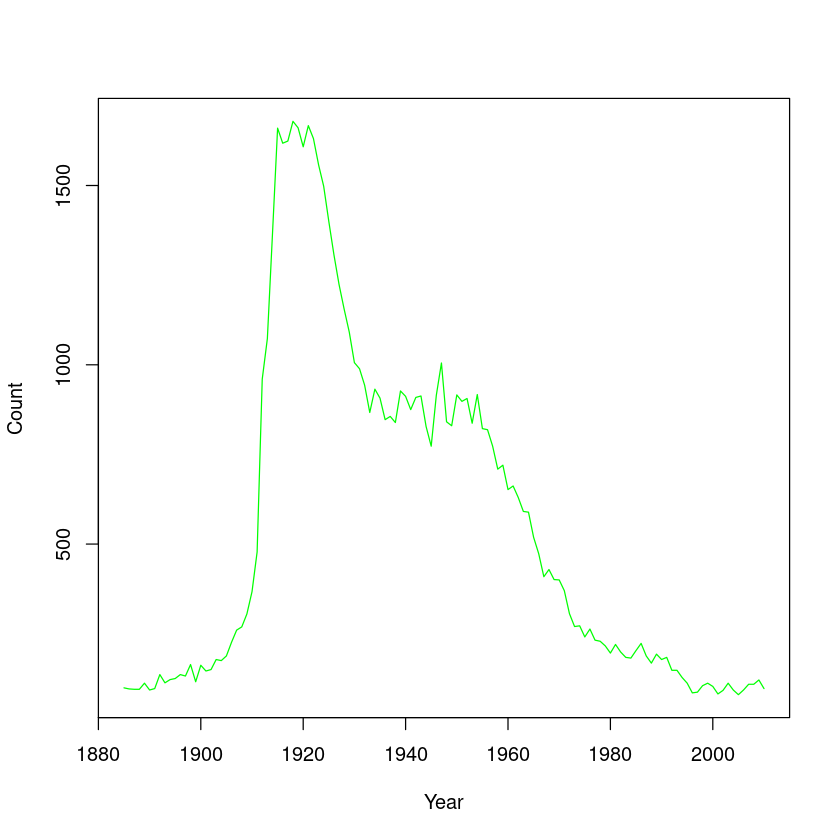

In [7]:
plot(mojos,type="l",col="green")

You can also do some simple math on the data, and have the result returned. The math is done on the database server.

In [12]:
dbGetQuery(conn.baby,"select sum(Count),count(Year) from babyNames 
where Name='Morris' and Sex='M' order by Year ;")

sum(Count),count(Year)
69133,126


It will confuse things if you have a field named the same as the math commands. You can have both calculated and non calculated values in a select.

In [14]:
head(dbGetQuery(conn.baby,"select Year*Count,year,count from babyNames 
where Name='Morris' and Sex='M' order by Year ;"))

Year*Count,Year,Count
186615,1885,99
181056,1886,96
179265,1887,95
179360,1888,95
211568,1889,112
175770,1890,93


In [8]:
head(dbGetQuery(conn.baby,"select Name,count as cnt from babyNames group by Name order by cnt desc ;"))

Name,cnt
Jacob,22082
Ethan,17985
Michael,17308
Jayden,17152
William,17030
Alexander,16742


In [9]:
head(dbGetQuery(conn.baby,"select count(*) from babyNames where Name='Chanel';"))

count(*)
70
